In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('CART.xlsx')
data

,RID,age,income,student,credit_rating,buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


Data Encoding Procedure

In [4]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [5]:
le_age= LabelEncoder()
le_income = LabelEncoder()
le_student = LabelEncoder()
le_credit_rating = LabelEncoder()
le_buys_computer = LabelEncoder()

In [6]:
data['age_n'] = le_age.fit_transform(data['age'])
data['income_n'] = le_income.fit_transform(data['income'])
data['student_n'] = le_student.fit_transform(data['student'])
data['credit_rating_n'] = le_credit_rating.fit_transform(data['credit_rating'])
data['buys_computer_n'] = le_credit_rating.fit_transform(data['buys_computer'])

In [7]:
data.head()

,RID,age,income,student,credit_rating,buys_computer,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,youth,high,no,fair,no,2,0,0,1,0
1,2,youth,high,no,excellent,no,2,0,0,0,0
2,3,middle_aged,high,no,fair,yes,0,0,0,1,1
3,4,senior,medium,no,fair,yes,1,2,0,1,1
4,5,senior,low,yes,fair,yes,1,1,1,1,1


In [8]:
# Structuring DataFrame
data_new = data.drop(['age','income','student','credit_rating','buys_computer'], axis='columns')
data_new.head()

,RID,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,2,0,0,1,0
1,2,2,0,0,0,0
2,3,0,0,0,1,1
3,4,1,2,0,1,1
4,5,1,1,1,1,1


In [9]:
# Independent and Dependent Variables
feature_cols = ['age_n','income_n','student_n','credit_rating_n']
x = data_new.drop(['buys_computer_n','RID'], axis='columns') # input
y = data_new['buys_computer_n'] # target

In [10]:
x.head()

,age_n,income_n,student_n,credit_rating_n
0,2,0,0,1
1,2,0,0,0
2,0,0,0,1
3,1,2,0,1
4,1,1,1,1


In [11]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: buys_computer_n, dtype: int32

In [12]:
# Build decision tree model without splitting
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
dt = clf.fit(x,y)
dt

DecisionTreeClassifier()

In [13]:
# Splitting Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [14]:
# Build decision tree model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
dt = clf.fit(x_train, y_train)
dt

DecisionTreeClassifier()

In [15]:
# Evaluating the model
from sklearn import metrics
y_pred = clf.predict(x_test)

In [16]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.75


In [18]:
# Visualizing Decision Tree
from sklearn.tree import export_graphviz
import pydotplus
from pydotplus.graphviz import graph_from_dot_data
#from sklearn.externals.six import StringIO
from io import StringIO
from six import StringIO


In [19]:
from IPython.display import display
from IPython.display import Image

In [20]:
# Visualizing Decision Tree
#import IPython
#import graphviz

In [21]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, feature_names=feature_cols, class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Decision_Tree.png')



True

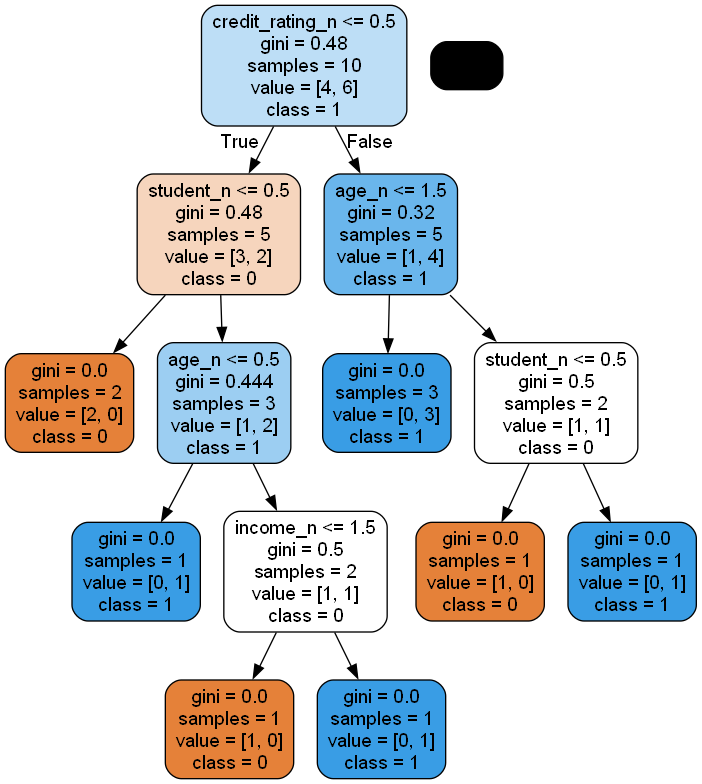

In [22]:
#display(graph.create_png())
Image(graph.create_png())